In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
dataset = load_breast_cancer()

In [3]:
data = pd.DataFrame(dataset.data)
data.columns = dataset.feature_names
print ("Shape of data:", data.shape)
data.head()

Shape of data: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## If detailed description of this dataset is needed uncomment the following cell

In [4]:
# print (dataset.DESCR)

## Let's run the LogisticRegression with all the features of dataset and see the results

## In dataset we don't have our Y (price) vector.
## Let's load prices of the dataset as Y vector

In [5]:
y = pd.DataFrame(dataset.target)
y.columns = ["malignant_benign"]
y.head()

,malignant_benign
0,0
1,0
2,0
3,0
4,0


## Preparing StandardScaler

In [6]:
from sklearn.preprocessing import StandardScaler

## Don't scale y value
## y is only going to be number of class needs to be classified

In [7]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scalerX = scaler.fit(data)
data = pd.DataFrame(scalerX.transform(data))
data.columns = dataset.feature_names
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## Split the data into train and test dataset, 20% dataset for testing

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=20)

X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
412,-1.343470,0.556251,-1.327108,-1.098077,-1.186348,-0.830283,-0.645945,-1.129548,-1.962815,0.629755,...,-1.305488,0.376621,-1.210830,-1.018857,-1.041918,-0.417085,-0.409653,-1.354653,-0.848940,0.449654
461,3.775318,1.624375,3.910226,5.250529,0.856812,1.790138,3.448859,3.094784,0.910477,-0.931027,...,4.094189,0.927033,4.287337,5.930172,0.146035,1.089930,1.972317,2.251919,-0.420228,-0.536193
532,-0.127037,-0.688730,-0.173371,-0.225791,-0.255504,-0.602486,-0.894910,-0.776893,-0.659428,-0.176862,...,-0.086807,-0.891932,-0.168624,-0.188419,-0.261639,-0.622558,-0.727249,-0.419740,-0.153294,-0.339467
495,0.210940,0.214172,0.170979,0.073978,-0.034891,-0.395915,-0.258122,0.015240,-1.185164,-0.753827,...,-0.053674,0.456415,-0.100117,-0.170488,-0.472051,-0.734519,-0.490252,-0.196518,-0.860264,-0.995036
13,0.489274,1.084495,0.483201,0.363507,-0.878913,-0.078478,0.132840,0.121770,0.129175,-1.335044,...,0.118205,0.322883,0.141149,-0.007178,-0.844656,-0.393548,-0.191846,-0.041207,-0.148441,-1.167934


## Using Logistic Regression without StandardScalar and Regularization
##### multi_class='ovr' -> binary classification other options are 'auto', and 'multinomial', n_job=-1 means all the processors will be used for this process. 'n_jobs' is ignored when using liblinear

In [9]:
lr = LogisticRegression(penalty='l2', multi_class='ovr', max_iter=10000, solver='liblinear')
lr.fit(X_train.iloc[:], y_train.iloc[:,0])

LogisticRegression(max_iter=10000, multi_class='ovr', solver='liblinear')

## Though we have set max_iter to 10000 due to default value of tol (tolerance) set to 0.0001 (1e-4) as soon as the decrease in the cost function is less than 1e-4 for ```n_iter_no_change=10``` consicutive iterations, trains stops

In [10]:
print ("Accuracy: ", lr.score(X_train, y_train))
print ("Coefficients: ", lr.coef_)
print ("Intercept:", lr.intercept_)
print ("Number of iterations:", lr.n_iter_)

Accuracy:  0.9868131868131869
Coefficients:  [[-0.23939451 -0.4802496  -0.24943782 -0.3486187  -0.17188238  0.42026548
  -0.84477262 -0.8120495   0.15652901  0.30930064 -1.35158953  0.14206476
  -0.63365677 -1.07465499 -0.25985974  0.70147135  0.16056696 -0.29151644
   0.29018782  0.59356696 -0.99290802 -1.06554479 -0.76788196 -0.99210531
  -0.64787176  0.03493142 -0.78340491 -0.83311792 -0.892313   -0.54889898]]
Intercept: [0.16665268]
Number of iterations: [8]


In [11]:
print ("Accuracy with test dataset:", lr.score(X_test, y_test))

Accuracy with test dataset: 0.9912280701754386


In [12]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix

In [13]:
y_true = y_test
y_pred = lr.predict(X_test)
print (f"Accuracy score: {accuracy_score(y_test, y_pred)}")

Accuracy score: 0.9912280701754386


In [14]:
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
cm

array([[47,  1],
       [ 0, 66]])

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)

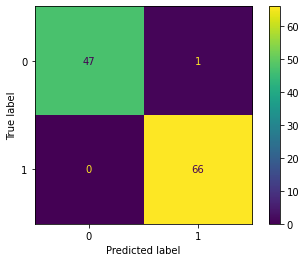

In [16]:
disp.plot()